In [1]:
#Single-Qubit Gates
#Amitava Chakraborty - 10th Jan 2019
from qiskit import IBMQ
# Loading your IBM Q account(s)
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
# Useful additional packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer, Aer

#Backend:  We want to know about the operators, hence we use the unitary simulator
#unitary_simulator allows us to calculate the unitary matrices
#Any single-q quantum gate is a 2x2 unitary matrix
#since quantum gates must be reversible and preserve probability amplitudes, 
#these matrices must be unitary
backend = BasicAer.get_backend('unitary_simulator')

In [4]:
#Single-Qubit Gates
#The single-qubit gates available are: - 
#Identity gate - Pauli gates - Clifford gates -  C3 gates - Standard rotation gates
# The operations are all unitary - hence all the gates can be represented as U-gates
q = QuantumRegister(1)

e:\developmentenvironments\anaconda3\envs\qiskit19_env\lib\site-packages\qiskit\util.py:109: DeprecationWarning: The QuantumCircuit.iden() method is deprecated as of 0.14.0, and will be removed no earlier than 3 months after that release date. You should use the QuantumCircuit.i() method instead.
  return func(*args, **kwargs)


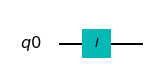

In [5]:
#Identity gate - this gate does nothing
qc = QuantumCircuit(q)
qc.iden(q) #Apply Identity to to a specified qubit (qubit).
qc.draw(output='mpl')

In [6]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

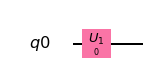

In [7]:
#In Qiskit a general unitary gate is U1 gate
#Representation of Identity gate
qc = QuantumCircuit(q)
#Apply U1 gate with angle theta to a specified qubit (qubit)
qc.u1(0,q) #The phase is 0
qc.draw(output='mpl')

In [8]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

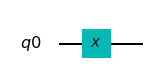

In [7]:
#Pauli gates
#simplest quantum gates : 𝑋, 𝑌 and 𝑍
#Their action is to perform a half rotation (PI) of the Bloch sphere around the x, y and z axes. 
#So the effect is similar to the classical NOT gate or bit-flip on the respective axes. 

#Action of the 𝑋 gate on the states |0⟩ and |1⟩
#𝑋|0⟩=|1⟩,𝑋|1⟩=|0⟩.
# X - bit-flip gate
qc = QuantumCircuit(q)
qc.x(q)
qc.draw(output='mpl')

In [8]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[0.+0.j, 1.-0.j],
       [1.+0.j, 0.+0.j]])

In [7]:
#One may wish to execute the circuit in other backends as well.
job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
result
# Print the result
print(result.get_counts(qc))

QiskitError: 'No counts for experiment "         ┌───┐\nq0_0: |0>┤ X ├\n         └───┘"'

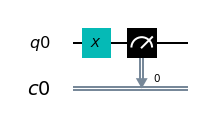

In [12]:
#In the last cell the error is due to the absence of measurement
#To rectify that we have to introduce a Classical Register
c = ClassicalRegister(1)

# Build the circuit again
qc = QuantumCircuit(q, c)
qc.x(q)
qc.measure(q, c)
qc.draw(output='mpl')

In [13]:
job = execute(qc, backend = Aer.get_backend('qasm_simulator'), shots=1024)
result = job.result()
result
# Print the result
print(result.get_counts(qc))

{'1': 1024}


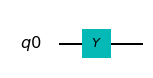

In [11]:
# Y - bit and phase flip gate - half rotation aroud Y axis
qc = QuantumCircuit(q)
qc.y(q)
qc.draw(output='mpl')

In [12]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.+0.j, -0.-1.j],
       [ 0.+1.j,  0.+0.j]])

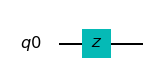

In [9]:
# Z - phase-flip gate - half rotation around Z axis
#Action of 𝑍 gate on the states |+⟩ and |−⟩
#𝑍|+⟩=|−⟩,𝑍|−⟩=|+⟩.
qc = QuantumCircuit(q)
qc.z(q)
qc.draw(output='mpl')

In [10]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 1.+0.j,  0.+0.j],
       [ 0.+0.j, -1.+0.j]])

The most general single qubit gate is $\mathrm{U3}$ given by matrix

$$
U(\theta, \phi, \lambda) = 
\mathrm{U3}=
\begin{pmatrix}
\cos(\theta/2) & -\mathrm{e}^{i\lambda}\sin(\theta/2) \\
\mathrm{e}^{i\phi}\sin(\theta/2) & \mathrm{e}^{i(\phi+\lambda)}\cos(\theta/2) 
\end{pmatrix}.
$$

If the gate is applied on qubit in state $|0\rangle$, the most general description of quantum state is obtained, i.e.
$$
\mathrm{U3}|0\rangle = |\psi_0\rangle = \cos(\theta/2)|0\rangle + \mathrm{e}^{i\phi}\sin(\theta/2)|1\rangle,
$$
where angles $\phi$ and $\theta$ describe position of the state on Bloch sphere.

When the gate is applied on qubit in state $|1\rangle$, the result is
$$
\mathrm{U3}|1\rangle = |\psi_1\rangle = \mathrm{e}^{i\lambda}(-\sin(\theta/2)|0\rangle + \mathrm{e}^{i\phi}\cos(\theta/2)|1\rangle)
$$

Obviously term $\mathrm{e}^{i\lambda}$ can be ignored because it is the global phase of a state.

I can imagine that global phase can be useful for constructing contolled global phase gate but it can be implemented as $\mathrm{Ph}(\lambda) \otimes I$,

where 
$$
\mathrm{Ph}(\lambda) = 
\begin{pmatrix}
1 & 0 \\
0 & \mathrm{e}^{i\lambda}.
\end{pmatrix}
$$

The parameter $\lambda$ in $\mathrm{U3}$, in fact, the parameter is $e^{i\lambda}$ - it is a global phase only if it is acting on the basis state $|1\rangle$. But if it is acting on any superposition of states, then it behaves as a relative phase, and absolutely critical.

$\lambda$ is also a rotation around the $z$ axis. However, there is an ordering issue. There is a sequence of $z$-rotation ($\lambda$), $y$-rotation ($\theta$), $z$-rotation ($\varphi$).[1]:https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.u3.html


With this above definition of U3, we can derive the following gates:
$$
\begin{split}
U_1(\lambda) &= U(0, 0, \lambda) = \begin{pmatrix}
1 & 0 \\ 0 & e^{i\lambda}
\end{pmatrix} \\
U_2(\phi, \lambda) &= U\left(\frac{\pi}{2}, \psi, \lambda\right) = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & -e^{i\lambda} \\ e^{i\phi} & e^{i(\lambda+\phi)}
\end{pmatrix}
\end{split}
$$

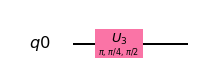

In [20]:
#u gates

#All single-qubit operations are compiled down to gates known as U1 , U2 and U3 
#before running on real IBM quantum hardware. 
#For that reason they are sometimes called the physical gates. 
#In Qiskit, the most general is U3 gate
qc = QuantumCircuit(q)
#Apply U3 gate with angle theta, phi, and lam to a specified qubit (qubit)
qc.u3(pi,pi/4,pi/2,q)
qc.draw(output='mpl')

In [21]:
job = execute(qc, backend)
result = job.result().get_unitary(qc, decimals=3)
result

array([[ 0.   +0.j   , -0.   -1.j   ],
       [ 0.707+0.707j,  0.   +0.j   ]])

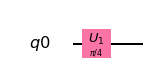

In [23]:
#u gates - In Qiskit another general unitary is U1 gate, one can modify the phase of X and Y
#The U1 gate is known as the phase gate and is essentially the same as Rz(λ). 
qc = QuantumCircuit(q)
qc.u1(pi/4,q) #pi/2,q)
qc.draw(output='mpl')

In [24]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

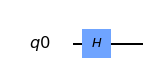

In [25]:
#Clifford gates
#1. Hadamard gate - half rotation around an axis at 45 degrees to both X and Z
#creates superposition
#So far the output behaviours were classical - now it will be quantum
#It is eqv to a coin-flip experiment
qc = QuantumCircuit(q)
qc.h(q)
qc.draw(output='mpl')

In [26]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j,  0.707-0.j],
       [ 0.707+0.j, -0.707+0.j]])

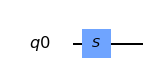

In [27]:
#S (root-Z phase) gate 
#Quarter turns (PI/2) of the Bloch sphere around the z axis
#S and S-dagger - regarded as the two possible square roots of the 𝑍 gate
qc = QuantumCircuit(q)
qc.s(q)
qc.draw(output='mpl')

In [28]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

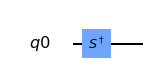

In [29]:
#CS-conjugate (conjugate of root-Z phase) gate
qc = QuantumCircuit(q)
qc.sdg(q)
qc.draw(output='mpl')

In [30]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])

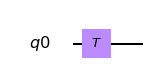

In [31]:
#C3 gates
#T (root-S phase) gate - PI/4 turns
#These 𝑇 and 𝑇† are Two specific examples of 𝑅𝑧(𝜃) (for 𝜃=±𝜋/4) - these are the square roots of 𝑆
qc = QuantumCircuit(q)
qc.t(q)
qc.draw(output='mpl')

In [32]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.   +0.j   , 0.   +0.j   ],
       [0.   +0.j   , 0.707+0.707j]])

A `tdg(q)` applies the `Tdg`($T^{\dagger}$ (pronounced as $T$ - dagger)) gate to a qubit. 

$T$ is the<u> $\pi/8$ phase shift gate </u> whose matrix representation considering standard (computational) basis \{$|0\rangle$, $|1\rangle$\} is:

$$\left(\begin{matrix}1 & 0 \\ 0 & e^{i\pi/4}\end{matrix}\right)$$

`Tdg` is the <b>conjugate transpose</b> of the matrix $T$ i.e. $T^{\dagger}$, i.e.,

$$\left(\begin{matrix}1 & 0 \\ 0 & e^{-i\pi/4}\end{matrix}\right)$$

Thus, the $T$ gate maps the basis vectors (of a qubit) $|0\rangle$ to $|0\rangle$ itself and $|1\rangle$ to $e^{i\pi/4}|1\rangle$, whereas $T^{\dagger}$ maps $|0\rangle$ to $|0\rangle$ itself and $|1\rangle$ to $e^{-i\pi/4}|1\rangle$.

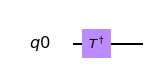

In [33]:
#T-conjugate (conjugate of root-S phase) gate
qc = QuantumCircuit(q)
qc.tdg(q)
qc.draw(output='mpl')

In [40]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.866+0.j , -0.   -0.5j],
       [ 0.   -0.5j,  0.866+0.j ]])

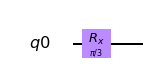

In [41]:
#Standard Rotations - Non-Clifford Gates
#The standard rotation gates are those that define rotations around the Pauli Gates

#Rotation around X-axis
qc = QuantumCircuit(q)
qc.rx(pi/3,q)
qc.draw(output='mpl')

In [42]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.866+0.j , -0.   -0.5j],
       [ 0.   -0.5j,  0.866+0.j ]])

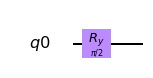

In [43]:
#Rotation around Y-axis
qc = QuantumCircuit(q)
qc.ry(pi/2,q)
qc.draw(output='mpl')

In [44]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.707+0.j, -0.707+0.j],
       [ 0.707+0.j,  0.707+0.j]])

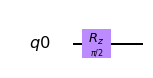

In [45]:
#Rotation around Z-axis
qc = QuantumCircuit(q)
qc.rz(pi/2,q)
qc.draw(output='mpl')

In [46]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+1.j]])

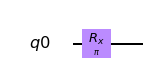

In [52]:
#Standard Rotations - any arbitrary rotation is possible
#Rotation around X-axis
qc = QuantumCircuit(q)
qc.rx(pi,q)  #say, pi/3 rotation
qc.draw(output='mpl')

In [53]:
job = execute(qc, backend)
M=job.result().get_unitary(qc, decimals=3)
print(M)

[[ 0.+0.j -0.-1.j]
 [ 0.-1.j  0.+0.j]]


In [54]:
vec = [[1,0]]
print(np.multiply(M,vec))

[[0.+0.j 0.-0.j]
 [0.-1.j 0.+0.j]]


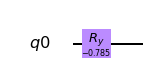

In [55]:
#Arbitrary Rotation around Y-axis
qc = QuantumCircuit(q)
#qc.ry(pi/6,0)
qc.ry( -3.14159/4,0)

qc.draw(output='mpl')

In [56]:
job = execute(qc, backend)
job.result().get_unitary(qc, decimals=3)

array([[ 0.924+0.j,  0.383+0.j],
       [-0.383+0.j,  0.924+0.j]])

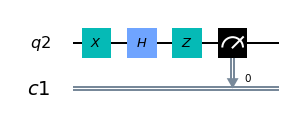

In [20]:
#Now we are equipped with knowledge to construct intricate circuits on single qubit
# we start with a single qubit circuit
# we define our registers 
qr = QuantumRegister(1)
cr = ClassicalRegister(1)

# Our circuit is 'circ. We use qr and cr registers
circ = QuantumCircuit(qr,cr)
circ.x(qr[0]) # X (not) gate on qubit 0,  
circ.h(qr[0]) # Hadamard gate on qubit 0,
circ.z(qr[0])
# add measurement gate
circ.measure(qr,cr) # to perform measurement of the qubits in qr to the bits in cr

# see whart the circuit looks like:  
circ.draw(output='mpl')

In [7]:
# execute and display
backend = BasicAer.get_backend('qasm_simulator')
result = execute(circ,backend,shots=1234).result()

d = result.get_counts(circ)
d

{'1': 652, '0': 582}

In [9]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(circ))

NameError: name 'result' is not defined

In [9]:
#Circuit Properties
print('Circuit Width : ',circ.width())
print('# of qubits : ',circ.n_qubits)
print('Operation : ',circ.count_ops())
print('Circuit Size : ',circ.size())
print('Circuit Depth : ',circ.depth())
print('Unitary Factors : ',circ.num_unitary_factors())

Circuit Width :  2
# of qubits :  1
Operation :  OrderedDict([('x', 1), ('h', 1), ('z', 1), ('measure', 1)])
Circuit Size :  4
Circuit Depth :  4
Unitary Factors :  1


In [5]:
circ = QuantumCircuit(1,1)
#z-measurement : 
#the hardware behind quantum computing typically only allows the z measurement to be performed directly.
# It is only one of an infinite number of possible ways to extract a bit from a qubit. 
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)

#x measurement : Another commonly used measurement
#Not directly available in QC hardware - 
#we achieve it indirectly by moving x basis information to the z basis
#It can be performed using the following sequence of gates.
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

#So we have created the two measurement circuits

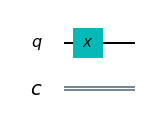

In [6]:
#Now let us add an operation to the circuit on which we want to perform the x & z measurements
#A simple X operation
circ.x(0)
circ.draw(output='mpl')

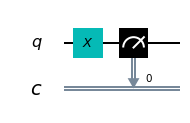

In [7]:
#Now we add the z-measure circuit to our original circuit
qc = circ + measure_z
qc.draw()

Results for z measurement:


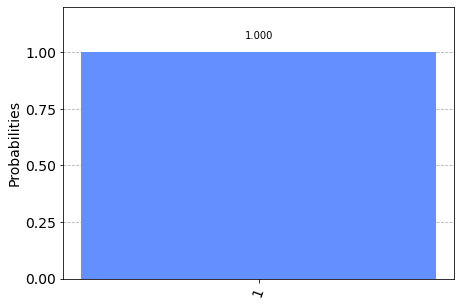

In [10]:
print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

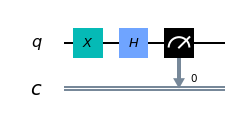

In [11]:
#Now we add the x-measure circuit to our original circuit
qc = circ + measure_x
qc.draw()

Results for x measurement:


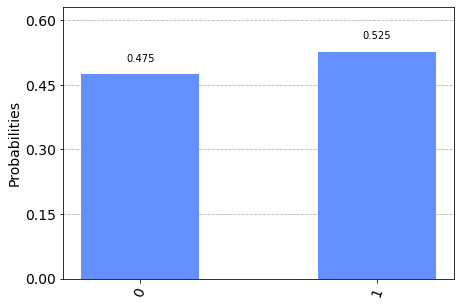

In [12]:
print('Results for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Results for z measurement:


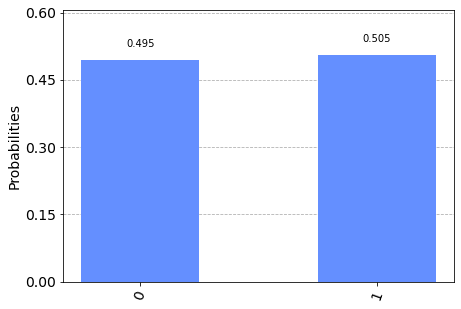

In [13]:
#Let us see what happens for a simple Hadamard operation
qc_h = QuantumCircuit(1)
qc_h.h(0)
qc = qc_h + measure_z

qc.draw()

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

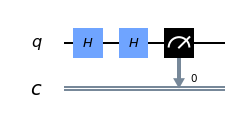

In [14]:
# Now if we perform an x measurement we see that the output for this circuit is 0. 
#The results are not same as that for an empty circuit. 
qc = qc_h + measure_x
qc.draw()

Results for x measurement:


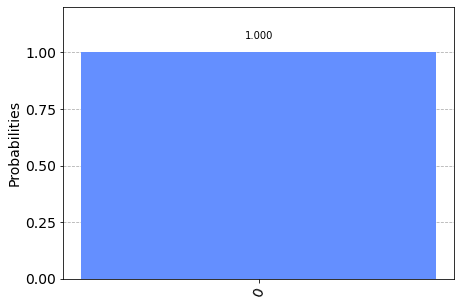

In [15]:
print('Results for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [21]:
# The effect of Ry with z and x measurements.
qc_y = QuantumCircuit(1)
qc_y.ry( -3.14159/6,0)

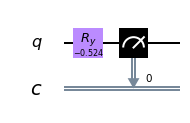

In [22]:
qc = qc_y + measure_z
qc.draw()

Results for z measurement:


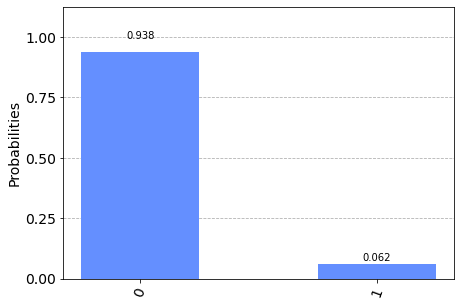

In [23]:
print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)
# The z measurement is most likely to output 0, but it is not completely certain. 

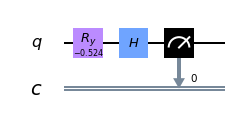

In [24]:
qc = qc_y + measure_x
qc.draw()


Results for x measurement:


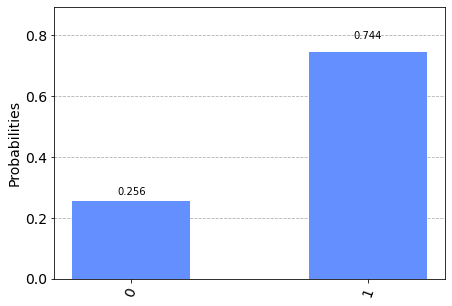

In [25]:
print('\nResults for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)
# For the x measurement: it is most likely, but not certain, to output 1.

In [39]:
#These results suggests that Qubits have a limited amount of certainty
#So despite the different ways we can extract outputs from a qubit, 
#it can only be used to store a single bit of information. 
#For a blank circuit, this certainty was dedicated entirely to the outcomes of z measurements. 
#For the circuit with a single Hadamard, it was dedicated entirely to x measurements. 

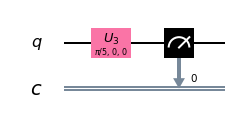

In [27]:
circ = QuantumCircuit(1,1)

theta = pi/5

circ.u3(theta,0,0,[0])
circ.measure([0],[0])
circ.draw(output='mpl')

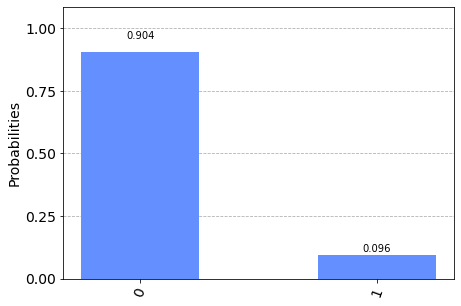

In [28]:
result = execute(circ,Aer.get_backend('qasm_simulator'), shots=8192).result()
plot_histogram(result.get_counts(circ))

#### The Bloch sphere 

U gate can control our qubit to any given state

\begin{equation} 
U(\theta,\phi,\lambda) = 
\left(
\begin{array}{cc}
\cos{\frac{\theta}{2}} & -e^{i\lambda}\sin{\frac{\theta}{2}}  \\
e^{i\phi}\sin{\frac{\theta}{2}} &  e^{i\lambda+i\phi}\cos{\frac{\theta}{2}} \\
\end{array}
\right)
\end{equation}


Let's try this

In [29]:
from math import pi,cos,sin,sqrt
print(f"cosine squared of 𝛉/2 is {cos(theta/2)**2:.3f}")

cosine squared of 𝛉/2 is 0.905


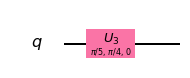

In [30]:
circ = QuantumCircuit(1)
𝛉 = pi/5
𝛟 = pi/4
𝛌 = 0

circ.u3(𝛉,𝛟,𝛌,[0])
circ.draw(output='mpl')

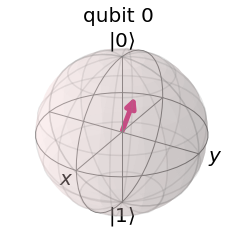

In [31]:
#%matplotlib notebook
result = execute(circ, backend=Aer.get_backend('statevector_simulator')).result()
quantum_state = result.get_statevector(circ, decimals=3)
# Bloch sphere visualization tool: 
from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(quantum_state)

<div>
<b>Note:</b>
The Pauli and Hadamard operators 
    
\begin{equation}
I = 
\left(
\begin{array}{cc}
 1 & 0  \\
 0 & 1  \\
\end{array}
\right)
\hspace{0.5cm}
X = 
\left(
\begin{array}{cc}
 0 & 1  \\
 1 & 0  \\
\end{array}
\right)
\hspace{0.5cm}
Y = 
\left(
\begin{array}{cc}
 0 & -i  \\
 i & 0  \\
\end{array}
\right)
\hspace{0.5cm}
Z = 
\left(
\begin{array}{cc}
 1 & 0  \\
 0 & -1  \\
\end{array}
\right)
\hspace{0.5cm}
H = \frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 1 & 1  \\
 1 & -1  \\
\end{array}
\right)
\hspace{0.5cm}
\end{equation}

Then it is easy to compute $HXH$: 

\begin{equation}
H\times X\times H = 
\frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 1 & 1  \\
 1 & -1  \\
\end{array}
\right) \times
\left(
\begin{array}{cc}
 0 & 1  \\
 1 & 0  \\
\end{array}
\right) \times
\frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 1 & 1  \\
 1 & -1  \\
\end{array}
\right) = 
\left(
\begin{array}{cc}
 1 & 0  \\
 0 & -1  \\
\end{array}
\right) = Z
\end{equation}

Another combination, $XHX$ equals :

\begin{equation}
X\times H\times X = 
\left(
\begin{array}{cc}
 0 & 1  \\
 1 & 0  \\
\end{array}
\right) \times
\frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 1 & 1  \\
 1 & -1  \\
\end{array}
\right) \times
\left(
\begin{array}{cc}
 0 & 1  \\
 1 & 0  \\
\end{array}
\right) = 
\frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 -1 & 1  \\
  1 & 1  \\
\end{array}
\right)
\end{equation}

Which produces supespotion (like $H$ does) : 

\begin{equation}
\frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 -1 & 1  \\
 1 & 1  \\
\end{array}
\right) \times |0> =
\frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 -1 & 1  \\
 1 &  1  \\
\end{array}
\right) \times
\left(
\begin{array}{cc}
  1  \\
  0  \\
\end{array}
\right) = 
\frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 -1  \\
  1  \\
\end{array}
\right)
\end{equation}


\begin{equation}
\frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 -1 & 1 \\
 1 & 1  \\
\end{array}
\right) \times |1> =
\frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 -1 & 1  \\
 1 &  1  \\
\end{array}
\right) \times
\left(
\begin{array}{cc}
  0 \\
  1 \\
\end{array}
\right) = 
\frac{1}{\sqrt{2}}
\left(
\begin{array}{cc}
 1  \\
 1  \\
\end{array}
\right)

    \end{equation}

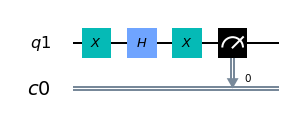

In [35]:
qr = QuantumRegister(1)
cr=ClassicalRegister(1)
circ = QuantumCircuit(qr,cr)

circ.x(0)
circ.h(0)
circ.x(0)
circ.measure(0,0)
circ.draw(output='mpl')

Results for z measurement:


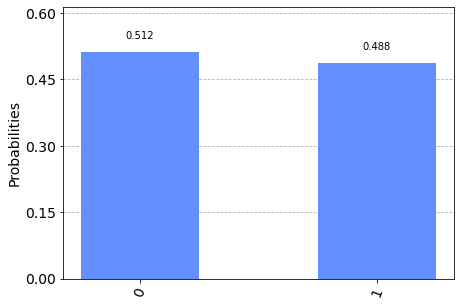

In [36]:
print('Results for z measurement:')
counts = execute(circ,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)